### Import required libraries

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline

### Set hyperparameters

In [2]:
batch_size = 100
learning_rate = 0.0002
num_epoch = 1

### Data

In [3]:
mnist_train = dset.MNIST('./', train=True, transform=transforms.ToTensor(), 
                         target_transform=None, download=True)
mnist_test = dset.MNIST('./', train=False, transform=transforms.ToTensor(),
                        target_transform=None, download=True)

In [4]:
train_loader = DataLoader(mnist_train, batch_size=batch_size, 
                          shuffle=True, num_workers=2, drop_last=True)
test_loader = DataLoader(mnist_test, batch_size=batch_size,
                         shuffle=False, num_workers=2, drop_last=True)

### Model

In [5]:
class Encoder(nn.Module):
    def __init__(self):
        super(Encoder, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 16, 3, padding=1), # batch X 16 X 28 X 28
            nn.ReLU(),
            nn.BatchNorm2d(16),
            nn.Conv2d(16, 32, 3, padding=1), # batch X 32 X 28 X 28
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.Conv2d(32, 64, 3, padding=1), # batch X 64 X 28 X 28
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(2, 2) # batch X 64 X 14 X 14
        )
        self.layer2 = nn.Sequential(
            nn.Conv2d(64, 128, 3, padding=1), # batch X 128 X 14 X 14
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.MaxPool2d(2, 2), # batch X 128 X 14 X 14 X 1/4
            nn.Conv2d(128, 256, 3, padding=1), # batch X 256 X 7 X 7
            nn.ReLU()
        )
    
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(batch_size, -1)
        return out
    
encoder = Encoder()

In [7]:
class Decoder(nn.Module):
    def __init__(self):
        super(Decoder, self).__init__()
        self.layer1 = nn.Sequential(
            nn.ConvTranspose2d(256, 128, 3, 2, 1, 1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.ConvTranspose2d(128, 64, 3, 1, 1),
            nn.ReLU(),
            nn.BatchNorm2d(64)
        )
        self.layer2 = nn.Sequential(
            nn.ConvTranspose2d(64, 16, 3, 1, 1),
            nn.ReLU(),
            nn.BatchNorm2d(16),
            nn.ConvTranspose2d(16, 1, 3, 2, 1, 1),
            nn.ReLU()
        )
        
    def forward(self, x):
        out = x.view(batch_size, 256, 7, 7)
        out = self.layer1(out)
        out = self.layer2(out)
        return out
    
decoder = Decoder()

### Loss func & Optimizer

In [9]:
parameters = list(encoder.parameters()) + list(decoder.parameters())
loss_func = nn.MSELoss()
optimizer = torch.optim.Adam(parameters, lr=learning_rate)

### Train

In [24]:
try:
    encoder, decoder = torch.load('conv_autoencoder.pkl')
    print('\n--------model restored--------\n')
except:
    print('\n--------model not restored--------\n')
    pass

for i in range(num_epoch):
    for j, [image, label] in enumerate(train_loader):
        optimizer.zero_grad()
        
        image = Variable(image)
        output = encoder(image)
        output = decoder(output)
        loss = loss_func(output, image)
        
        loss.backward()
        optimizer.step()
        
        if j % 10 == 0:
            torch.save([encoder, decoder], 'conv_autoencoder.pkl')
            print(loss)


--------model not restored--------



/home/p829911/anaconda3/lib/python3.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Encoder. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/home/p829911/anaconda3/lib/python3.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Sequential. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/home/p829911/anaconda3/lib/python3.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Conv2d. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/home/p829911/anaconda3/lib/python3.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type ReLU. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ".

tensor(0.7805, grad_fn=<MseLossBackward>)
tensor(0.1551, grad_fn=<MseLossBackward>)
tensor(0.0987, grad_fn=<MseLossBackward>)
tensor(0.0784, grad_fn=<MseLossBackward>)
tensor(0.0682, grad_fn=<MseLossBackward>)
tensor(0.0615, grad_fn=<MseLossBackward>)
tensor(0.0544, grad_fn=<MseLossBackward>)
tensor(0.0482, grad_fn=<MseLossBackward>)
tensor(0.0431, grad_fn=<MseLossBackward>)
tensor(0.0372, grad_fn=<MseLossBackward>)
tensor(0.0331, grad_fn=<MseLossBackward>)
tensor(0.0295, grad_fn=<MseLossBackward>)
tensor(0.0256, grad_fn=<MseLossBackward>)
tensor(0.0216, grad_fn=<MseLossBackward>)
tensor(0.0209, grad_fn=<MseLossBackward>)
tensor(0.0199, grad_fn=<MseLossBackward>)
tensor(0.0184, grad_fn=<MseLossBackward>)
tensor(0.0164, grad_fn=<MseLossBackward>)
tensor(0.0155, grad_fn=<MseLossBackward>)
tensor(0.0148, grad_fn=<MseLossBackward>)
tensor(0.0146, grad_fn=<MseLossBackward>)
tensor(0.0140, grad_fn=<MseLossBackward>)
tensor(0.0127, grad_fn=<MseLossBackward>)
tensor(0.0125, grad_fn=<MseLossBac

### Check with Train Image

torch.Size([100, 28, 28])


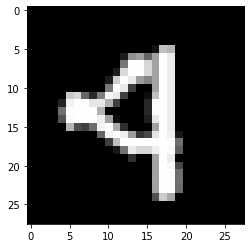

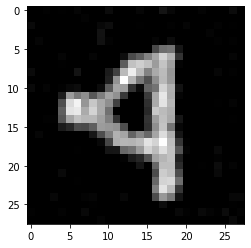

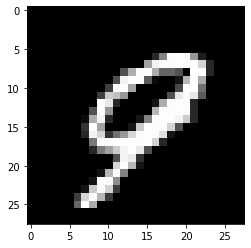

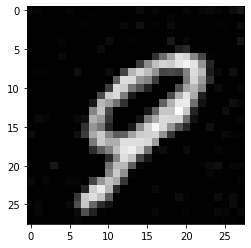

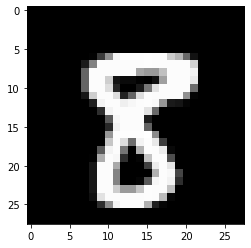

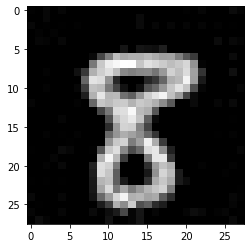

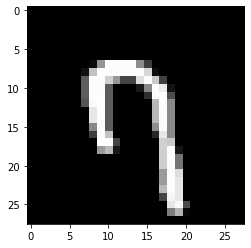

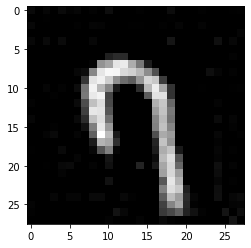

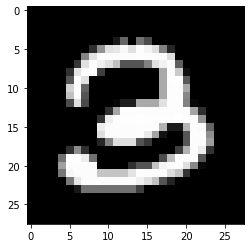

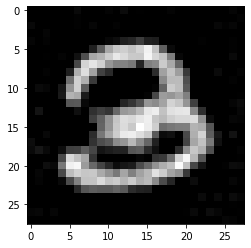

In [27]:
out_img = torch.squeeze(output.data)
print(out_img.size())

for i in range(5):
    plt.imshow(torch.squeeze(image[i]).numpy(), cmap='gray')
    plt.show()
    plt.imshow(out_img[i].numpy(), cmap='gray')
    plt.show()

In [29]:
for i in range(1):
    for j,[image,label] in enumerate(test_loader):
       
        image = Variable(image, volatile=True)
        output = encoder(image)
        output = decoder(output)
        
    if j % 10 == 0:
        print(loss)

/home/p829911/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  after removing the cwd from sys.path.


torch.Size([100, 28, 28])


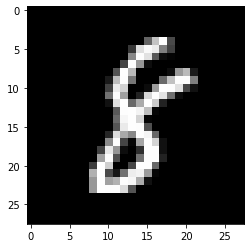

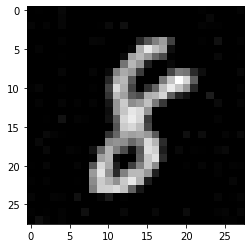

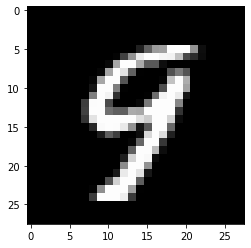

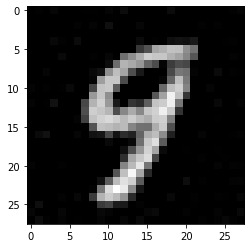

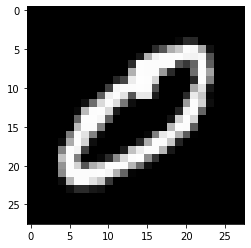

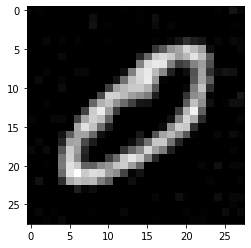

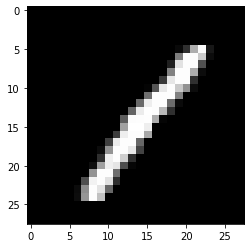

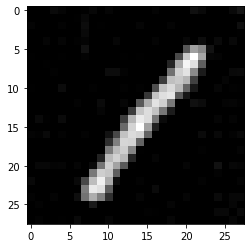

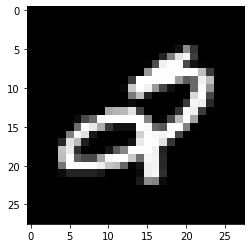

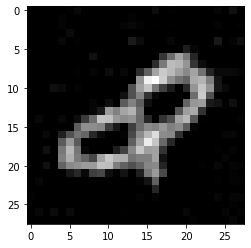

In [30]:
out_img = torch.squeeze(output.cpu().data)
print(out_img.size())

for i in range(5):
    plt.imshow(torch.squeeze(image[i].cpu()).data.numpy(),cmap='gray')
    plt.show()
    plt.imshow(out_img[i].numpy(),cmap='gray')
    plt.show()